In [1]:
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
nottem = pd.read_csv("nottem.csv", header=0, parse_dates=[0], names=['Month', 'Temp'], index_col=0)

In [3]:
nottem_ts = pd.Series(nottem.Temp.values, index=pd.date_range('1920-01-31', periods=240, freq='M'))

In [4]:
nottem_ts

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
              ... 
1939-08-31    61.8
1939-09-30    58.2
1939-10-31    46.7
1939-11-30    46.6
1939-12-31    37.8
Freq: M, Length: 240, dtype: float64

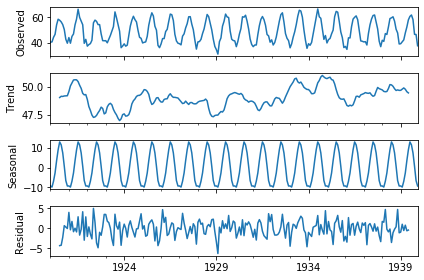

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(nottem_ts)
dplot = decomposed.plot()

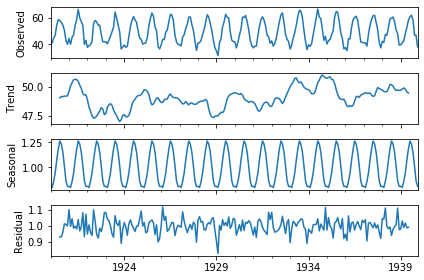

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(nottem_ts, model='multiplicative')
dplot = decomposed.plot()

In [7]:
# !pip install stldecompose

In [8]:
from stldecompose import decompose

In [9]:
stl = decompose(nottem_ts, period=12)
stl.trend.head()

1920-01-31    48.616042
1920-02-29    48.612980
1920-03-31    48.609917
1920-04-30    48.606960
1920-05-31    48.604002
Freq: M, dtype: float64

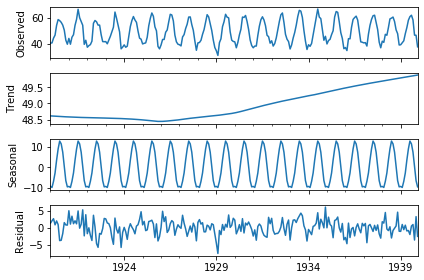

In [10]:
stl_visual = stl.plot()

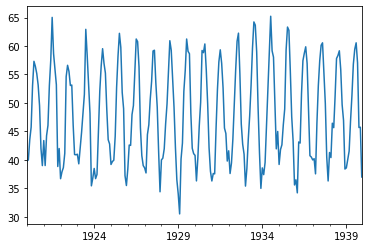

In [11]:
# seasonal adjustment

nottem_ts_adj = nottem_ts - decomposed.seasonal
nottem_ts_adj.plot()

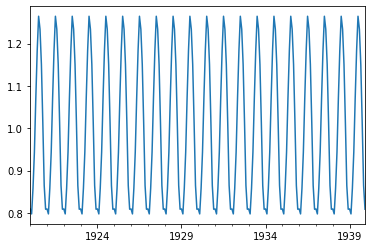

In [12]:
decomposed.seasonal.plot()

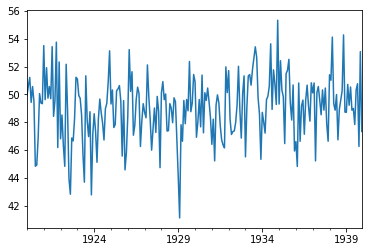

In [13]:
# seasonal adjustment

nottem_ts_adj_stl = nottem_ts - stl.seasonal
nottem_ts_adj_stl.plot()

In [14]:
# decomposotion based on srtl

from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)

In [15]:
stl = decompose(nottem_ts, period=12)

fcast = forecast(stl, steps=12, fc_func=seasonal_naive, seasonal=True)

In [16]:
fcast.head()

,seasonal_naive+seasonal
1940-01-31,40.508501
1940-03-02,40.006367
1940-04-02,43.014288
1940-05-03,47.111975
1940-06-03,53.384711


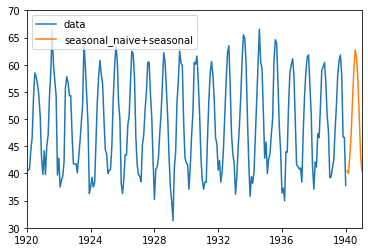

In [17]:
# plot of the forecast with the original data

plt.plot(nottem_ts, label='data')
plt.plot(fcast, label=fcast.columns[0])

plt.xlim('1920', '1941')
plt.ylim(30, 70)
plt.legend()

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [19]:
exps_model = ExponentialSmoothing(nottem_ts, seasonal='additive', seasonal_periods=12)

In [26]:
help(ExponentialSmoothing)

Help on class ExponentialSmoothing in module statsmodels.tsa.holtwinters:

class ExponentialSmoothing(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  ExponentialSmoothing(endog, trend=None, damped=False, seasonal=None, seasonal_periods=None, dates=None, freq=None, missing='none')
 |  
 |  Holt Winter's Exponential Smoothing
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      Time series
 |  trend : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of trend component.
 |  damped : bool, optional
 |      Should the trend component be damped.
 |  seasonal : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of seasonal component.
 |  seasonal_periods : int, optional
 |      The number of periods in a complete seasonal cycle, e.g., 4 for
 |      quarterly data or 7 for daily data with a weekly cycle.
 |  
 |  Returns
 |  -------
 |  results : ExponentialSmoothing class
 |  
 |  Notes
 |  -----
 |  This is a full implementatio

In [20]:
exps_model_fit = exps_model.fit()

SInce this is temperature data we can expect a smoothed out model as there is not much change in the seasonality

closer to 0 means that it is smooth. Closer to 1 means that it is a reactive model

In [24]:
# the alpha coefficient

exps_model_fit.params['smoothing_level']

0.031012806491223868

In [25]:
# the gamma coefficient

exps_model_fit.params['smoothing_seasonal']

0.0

In [28]:
# beta coeeficient.
# since there is no trend and hence this should be nan

exps_model_fit.params['smoothing_slope']

nan

In [31]:
exps_model_fit.predict(start=240, end=251)

TypeError: predict() missing 1 required positional argument: 'params'

In [33]:
exps_model_fit.forecast(steps=10)

1940-01-31    40.176764
1940-02-29    39.669372
1940-03-31    42.671950
1940-04-30    46.764669
1940-05-31    53.032211
1940-06-30    58.509931
1940-07-31    62.367722
1940-08-31    60.985502
1940-09-30    56.943149
1940-10-31    49.955710
Freq: M, dtype: float64

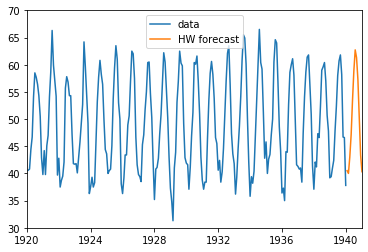

In [34]:
# plot of the forecast with the original data

plt.plot(nottem_ts, label='data')
plt.plot(fcast, label='HW forecast')

plt.xlim('1920', '1941')
plt.ylim(30, 70)
plt.legend()

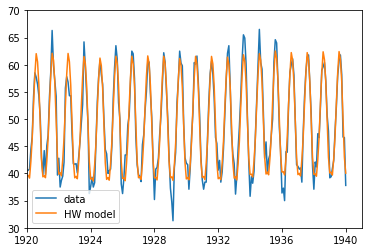

In [35]:
# comparing the model to original data

plt.plot(nottem_ts, label='data')
plt.plot(exps_model_fit.fittedvalues, label='HW model')

plt.xlim('1920', '1941')
plt.ylim(30, 70)
plt.legend()

# fb proiphet

In [36]:
nottem_ts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

In [37]:
nottem_df = pd.DataFrame({'ds': nottem_ts.index, 'y': nottem_ts.values})

In [38]:
nottem_df.head()

,ds,y
0,1920-01-31,40.6
1,1920-02-29,40.8
2,1920-03-31,44.4
3,1920-04-30,46.7
4,1920-05-31,54.1


In [44]:
from fbprophet import Prophet

In [45]:
mymodel = Prophet()
mymodel.fit(nottem_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future_data = mymodel.make_future_dataframe(periods=12, freq='m')
fcast = mymodel.predict(future_data)

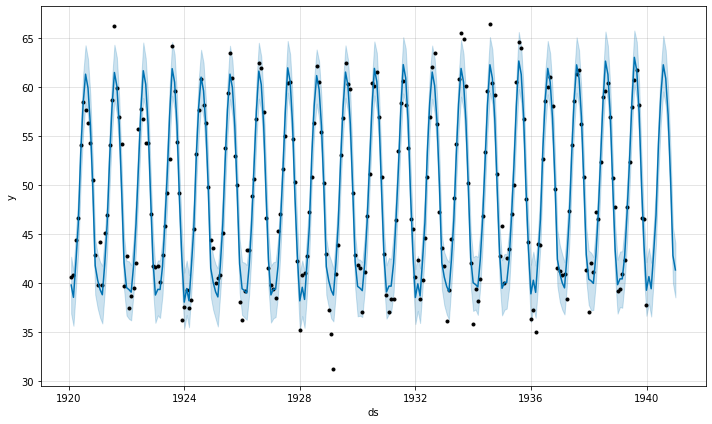

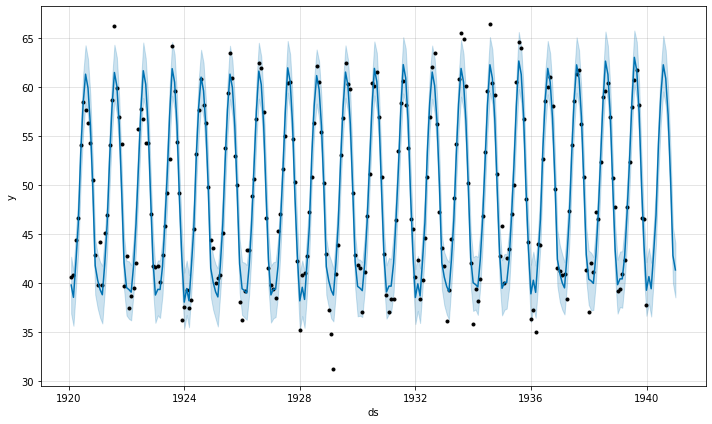

In [47]:
mymodel.plot(fcast)

The black dots are already present data